In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
#import pandasql as psql

In [2]:
#loading the dataset
data=pd.read_csv(r"/home/lab2/Documents/heart_2020_cleaned.csv",header=0)
#Backup the dataset
data_bk=data.copy()
#Displaying first 5 rows of the dataset
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#Displaying Dataset Shape
data.shape

(319795, 18)

In [4]:
#Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#Checking for Dulicated Values in the dataset
data.duplicated().any()

True

In [6]:
#Displaying for duplicated values in the dataset
data_dup=data[data.duplicated(keep='last')]
data_dup

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,Yes
41,No,28.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
46,No,33.23,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Very good,8.0,No,No,No
102,No,23.49,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.0,No,No,No
104,No,25.09,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
318065,No,28.06,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,9.0,No,No,No
318703,No,19.74,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
318736,No,24.41,Yes,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No


In [7]:
#Dropping the duplicated values in the dataset
data=data.drop_duplicates()
data.shape

(301717, 18)

In [8]:
#Resetting the row index
data=data.reset_index(drop=True)
#Backing up the data after deleting the duplicate values
data_bk1=data.copy()

In [9]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

Heart_count = data.HeartDisease.value_counts()
print('Class 0:', Heart_count[0])
print('Class 1:', Heart_count[1])
print('Proportion:', round(Heart_count[0] / Heart_count[1], 2), ': 1')
print('Total Bank records:', len(data))

Class 0: 274456
Class 1: 27261
Proportion: 10.07 : 1
Total Bank records: 301717


In [10]:
#The Dataset is Balanced

<function matplotlib.pyplot.show(close=None, block=None)>

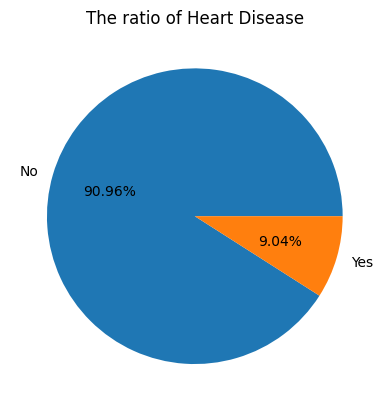

In [11]:
#Plotting the pie chart of the HeartDisease
plt.pie(x=data['HeartDisease'].value_counts(),autopct='%1.2f%%',labels=data['HeartDisease'].value_counts().index)
plt.title('The ratio of Heart Disease')
plt.show

In [12]:
#Displaying unique elements in each rows
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [13]:
#Displaying values of 'HeartDisease'
data['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [14]:
#converting the diagnosis values into int values by using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['HeartDisease']=le.fit_transform(data['HeartDisease'])
data['Smoking']=le.fit_transform(data['Smoking'])
data['AlcoholDrinking']=le.fit_transform(data['AlcoholDrinking'])
data['Stroke']=le.fit_transform(data['Stroke'])
data['DiffWalking']=le.fit_transform(data['DiffWalking'])
data['Sex']=le.fit_transform(data['Sex'])
data['Race']=le.fit_transform(data['Race'])
data['Diabetic']=le.fit_transform(data['Diabetic'])
data['PhysicalActivity']=le.fit_transform(data['PhysicalActivity'])
data['GenHealth']=le.fit_transform(data['GenHealth'])
data['Asthma']=le.fit_transform(data['Asthma'])
data['KidneyDisease']=le.fit_transform(data['KidneyDisease'])
data['SkinCancer']=le.fit_transform(data['SkinCancer'])

In [15]:
#Displaying Data set information after converting them using label encoder
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

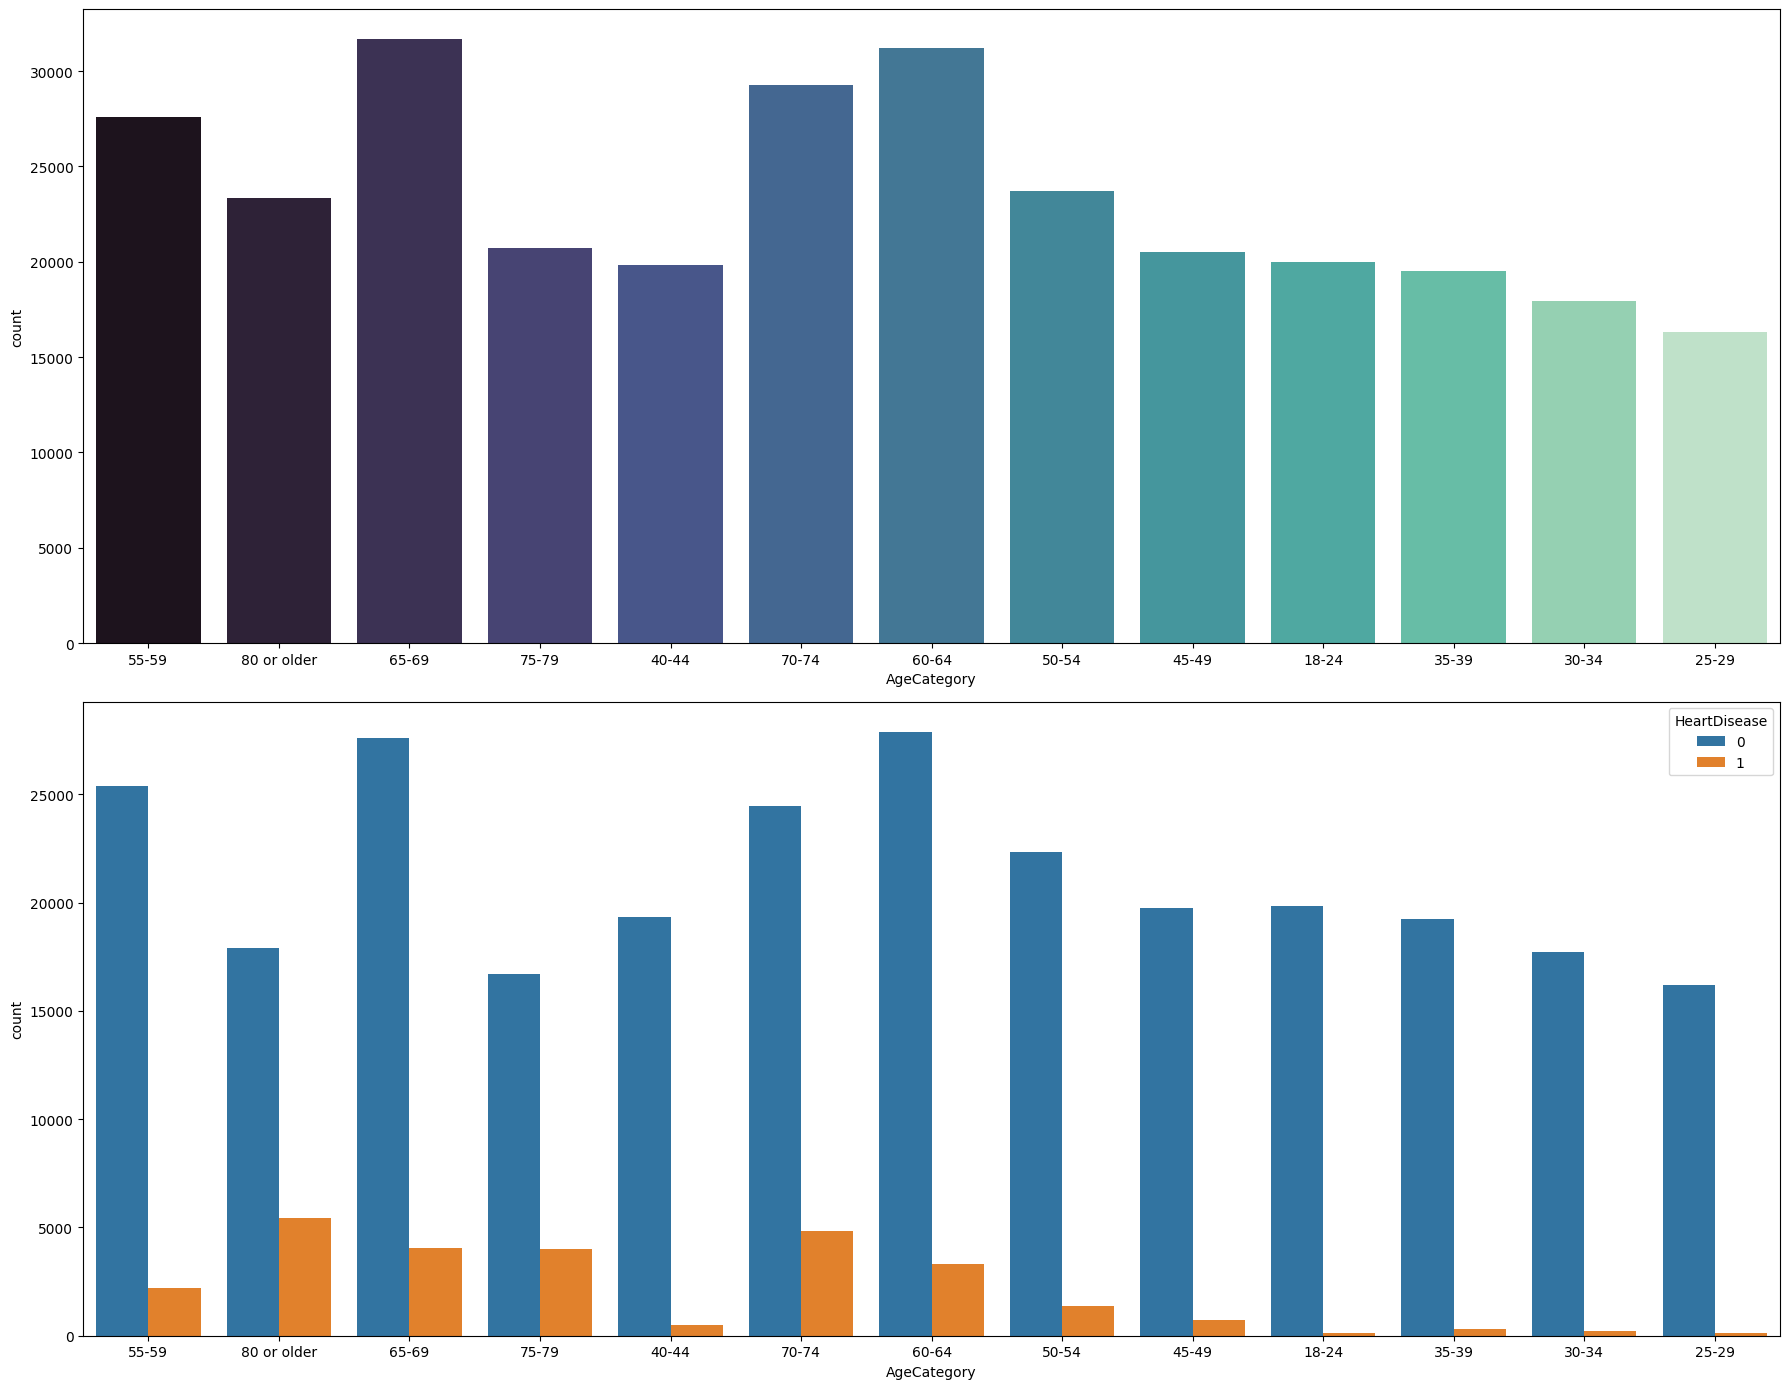

In [16]:
#Displaying counterplot of 'AgeCategory' using seaborn library
import seaborn as sns
fig , ax = plt.subplots(2,1,figsize = (18,14))
ax1 = sns.countplot(x=data["AgeCategory"],palette="mako",ax=ax[0])
#Checking in each category how many members has heart disease
ax2 = sns.countplot(x=data["AgeCategory"],hue=data["HeartDisease"],ax=ax[1])
#Displaying the graphs
plt.tight_layout()

In [17]:
#Displaying all unique values in 'AgeCategory'
data.AgeCategory.value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [18]:
#Defining a mean function to convert Age Category to mean values
def mean(l):
    sum=0
    for i in l:
        sum=sum+i
    return sum/len(l)
#Using map function convert all categories to mean values
data['AgeCategory']=data['AgeCategory'].map({'65-69':mean([65,69]),'60-64':mean([60,64]),'70-74':mean([70,74]),
                                            '55-59':mean([70,74]),'50-54':mean([50,54]),'80 or older':80,
                                            '75-79':mean([75,79]),'45-49':mean([45,49]),'18-24':mean([18,24]),
                                            '40-44':mean([40,44]),'35-39':mean([35,39]),'30-34':mean([30,34]),
                                            '25-29':mean([25,29])})

In [19]:
#Now checking the 'AgeCategory'
data.AgeCategory.value_counts()

72.0    56883
67.0    31670
62.0    31219
52.0    23736
80.0    23352
77.0    20713
47.0    20518
21.0    19998
42.0    19837
37.0    19526
32.0    17953
27.0    16312
Name: AgeCategory, dtype: int64

In [20]:
#Displaying the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  float64
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

<Axes: >

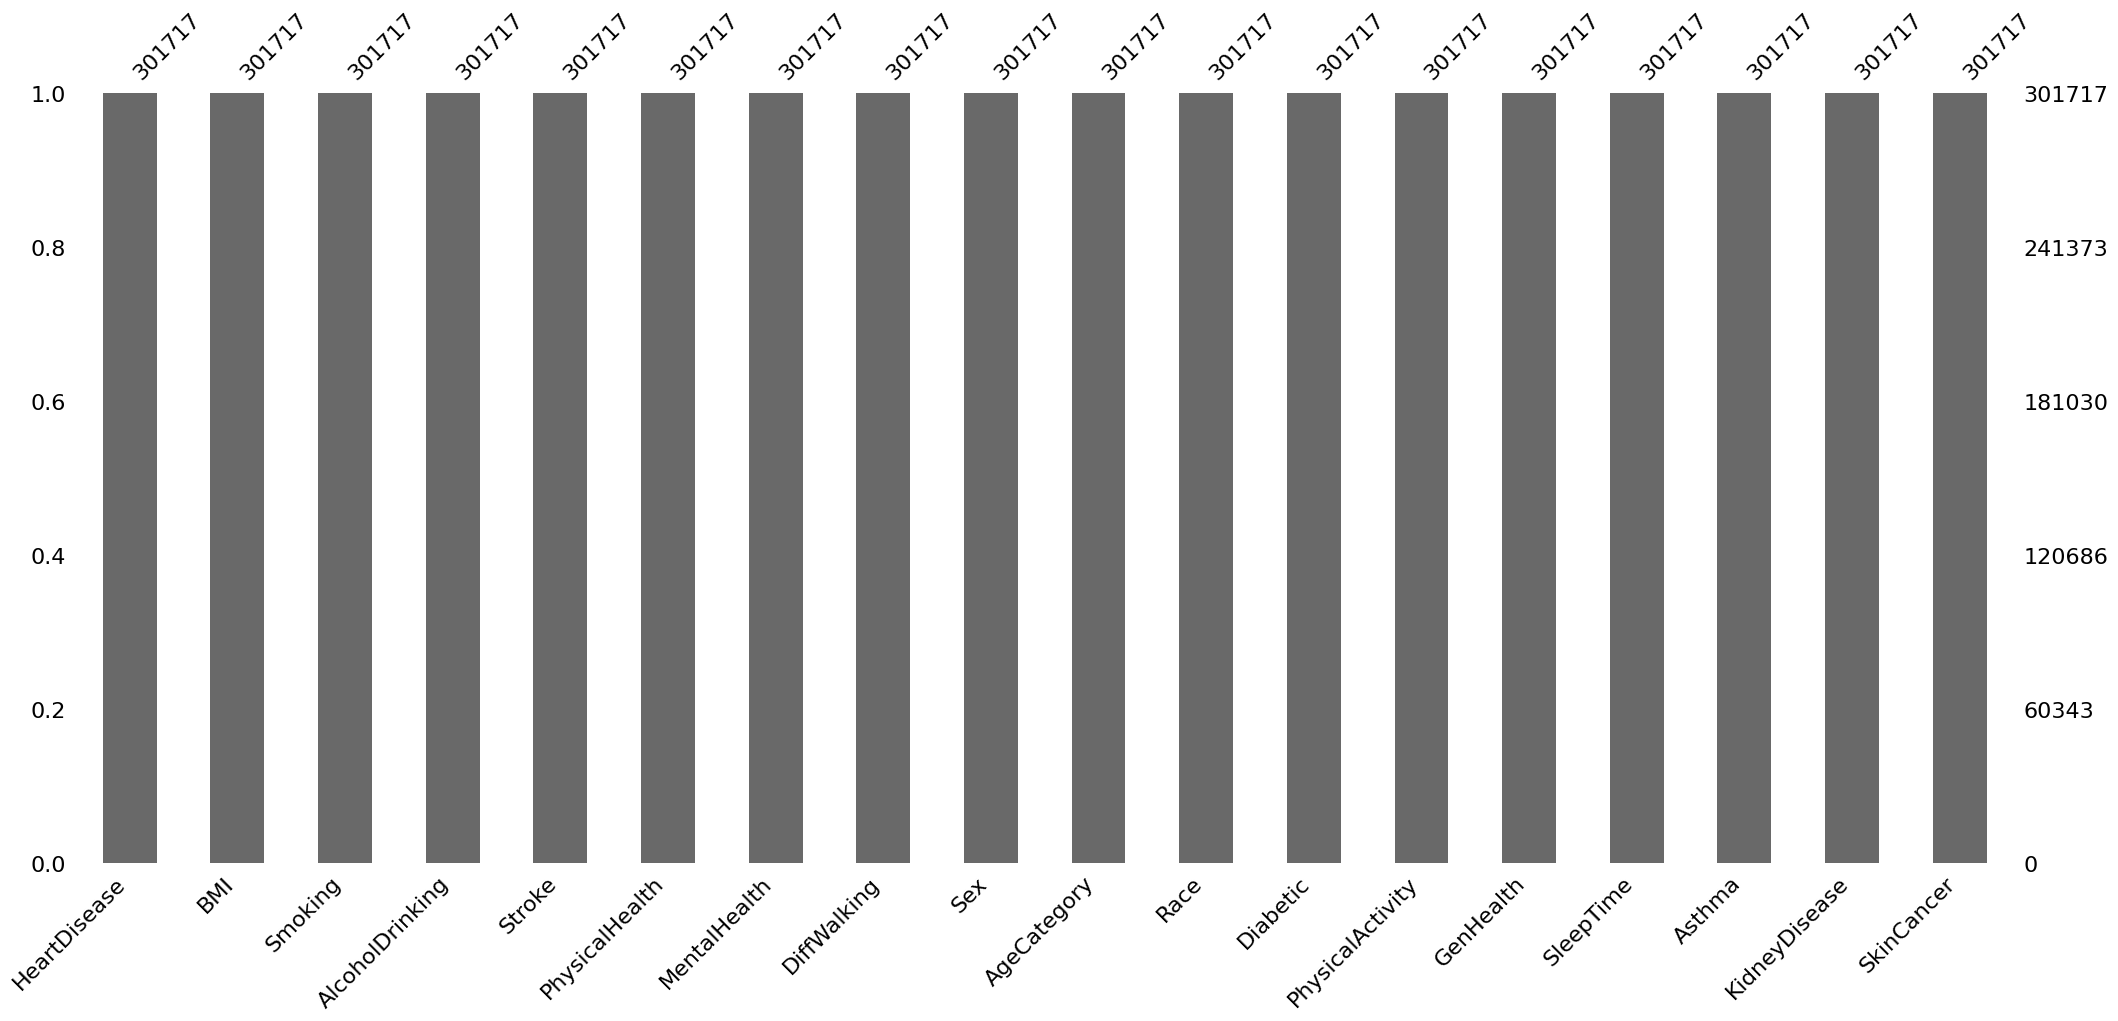

In [21]:
#plotting a bar graph displaying is there any missing values in the dataset
import missingno as msno
msno.bar(data)

In [22]:
#Displaying the null values in each column
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [23]:
#There is no null values in the dataset
#There is no need to delete any variable because all are influencing the target variable

In [24]:
#Displaying all columns 
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [25]:
# Identify the independent and targrt (dependent) variables
IndepVar = []
for col in data.columns:
    if col != 'HeartDisease':
        IndepVar.append(col)
TargetVar ='HeartDisease'

x = data[IndepVar]
y = data[TargetVar]

In [26]:
 # Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((211201, 17), (90516, 17), (211201,), (90516,))

In [27]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [28]:
#load the EM results dataset
EMResults=pd.read_csv(r"/home/lab2/Documents/EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [29]:
#loading the knn results dataset
KNN_Results=pd.read_csv(r"/home/lab2/Documents/KNN_Results.csv",header=0)
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN algorithm classification

In [30]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    print("------------------------------------------------------------------------------")
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1896  6237]
 [ 6219 76164]]
Outcome values : 
 1896 6237 6219 76164
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.23      0.23      8133
           0       0.92      0.92      0.92     82383

    accuracy                           0.86     90516
   macro avg       0.58      0.58      0.58     90516
weighted avg       0.86      0.86      0.86     90516

Accuracy : 86.2 %
Precision : 23.4 %
Recall : 23.3 %
F1 Score : 0.233
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 57.9 %
MCC : 0.158
------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  618  7515]
 [ 1225 81158]]
Outcome values : 
 618 7515 1225 81158
Classification report : 
               precision    recall  f1-score   support

           1       0

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  769  7364]
 [  998 81385]]
Outcome values : 
 769 7364 998 81385
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.09      0.16      8133
           0       0.92      0.99      0.95     82383

    accuracy                           0.91     90516
   macro avg       0.68      0.54      0.55     90516
weighted avg       0.87      0.91      0.88     90516

Accuracy : 90.8 %
Precision : 43.5 %
Recall : 9.5 %
F1 Score : 0.155
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 54.2 %
MCC : 0.17
------------------------------------------------------------------------------
KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  543  7590]
 [  659 81724]]
Outcome values : 
 543 7590 659 81724
Classification report : 
               precision    recall  f1-score   support

           1       0.

In [31]:
#Displaying knn dataset which stores all k values accuracy
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1896,6237,6219,76164,0.862,0.234,0.233,0.233,0.925,0.158,0.578818,0.579
1,KNeighborsClassifier(n_neighbors=2),2,618,7515,1225,81158,0.903,0.335,0.076,0.124,0.985,0.124,0.530559,0.530
2,KNeighborsClassifier(n_neighbors=3),3,1372,6761,3063,79320,0.891,0.309,0.169,0.218,0.963,0.174,0.565758,0.566
3,KNeighborsClassifier(n_neighbors=4),4,642,7491,1123,81260,0.905,0.364,0.079,0.130,0.986,0.135,0.532653,0.532
4,KNeighborsClassifier(),5,1099,7034,2089,80294,0.899,0.345,0.135,0.194,0.975,0.170,0.554886,0.555
5,KNeighborsClassifier(n_neighbors=6),6,633,7500,995,81388,0.906,0.389,0.078,0.130,0.988,0.141,0.532877,0.533
6,KNeighborsClassifier(n_neighbors=7),7,962,7171,1619,80764,0.903,0.373,0.118,0.180,0.980,0.169,0.549316,0.549
7,KNeighborsClassifier(n_neighbors=8),8,602,7531,894,81489,0.907,0.402,0.074,0.125,0.989,0.142,0.531584,0.532
8,KNeighborsClassifier(n_neighbors=9),9,858,7275,1365,81018,0.905,0.386,0.105,0.166,0.983,0.164,0.544464,0.544
9,KNeighborsClassifier(n_neighbors=10),10,601,7532,819,81564,0.908,0.423,0.074,0.126,0.990,0.147,0.531978,0.532


In [32]:
#k=20 was the Highest accuracy among the k=1 to 21

# comparision all of svm Algorithms

In [33]:
#Comparing the all SVM Models
x_train_reduced = x_train.sample(10000)
y_train_reduced = y_train.sample(10000)
from sklearn.svm import SVC
ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

models=[ModelSVM1,ModelSVMPoly,ModelSVMSig,ModelSVMGaussian]
for i in models:
    i.fit(x_train_reduced, y_train_reduced)
    
    # Prediction
    
    y_pred = i.predict(x_test)
    y_pred_prob = i.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', i)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : i,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #-----------------------------------------------------------------------------------------------------------------

Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[    0  8133]
 [    0 82383]]
Outcome values : 
 0 8133 0 82383
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      8133
           0       0.91      1.00      0.95     82383

    accuracy                           0.91     90516
   macro avg       0.46      0.50      0.48     90516
weighted avg       0.83      0.91      0.87     90516

Accuracy : 91.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[    0  8133]
 [    0 82383]]
Outcome values : 
 0 8133 0 82383
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00

In [34]:
#Displaying EMResults dataset
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",0,8133,0,82383,0.910,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,"SVC(degree=2, kernel='poly', probability=True)",0,8133,0,82383,0.910,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,"SVC(class_weight='balanced', kernel='sigmoid',...",3453,4680,42086,40297,0.483,0.076,0.425,0.129,0.489,-0.049,0.456854,0.457
3,"SVC(class_weight='balanced', probability=True,...",3044,5089,34814,47569,0.559,0.080,0.374,0.132,0.577,-0.028,0.475845,0.476


In [35]:
#Among the svm algorithms 'svm-Linear' Gives best Accuracy

# Comparing all 7 Algorithms

In [36]:
#load the EM results dataset for comparing Algorithms
EMResults1=pd.read_csv(r"/home/lab2/Documents/EMResults.csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  677  7456]
 [  655 81728]]
Outcome values : 
 677 7456 655 81728
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.08      0.14      8133
           0       0.92      0.99      0.95     82383

    accuracy                           0.91     90516
   macro avg       0.71      0.54      0.55     90516
weighted avg       0.88      0.91      0.88     90516

Accuracy : 91.0 %
Precision : 50.8 %
Recall : 8.3 %
F1 Score : 0.143
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 53.8 %
MCC : 0.179
roc_auc_score: 0.538


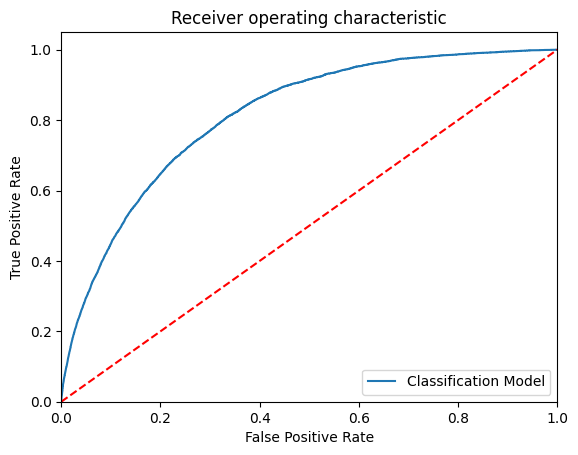

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 2004  6129]
 [ 6992 75391]]
Outcome values : 
 2004 6129 6992 75391
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.25      0.23      8133
           0       0.92      0.92      0.92     82383

    accuracy                           0.86     90516
   macro avg       0.57      0.58      0.58     90516
weighted avg       0.86      0.86      0.86     90516

Accuracy : 85.5 %
Precision : 22.3 %
Recall : 24.6 %
F1 Score : 0.234
Specificity or True Negative Rate : 91.5 %
Balanced Accuracy : 58.0 %
MCC : 0.154
roc_auc_score: 0.581


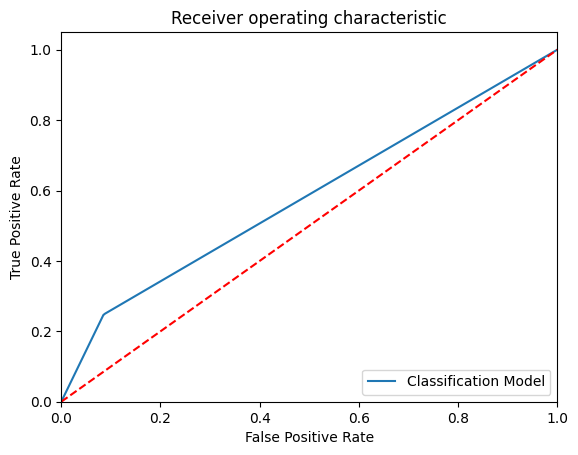

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  961  7172]
 [ 1786 80597]]
Outcome values : 
 961 7172 1786 80597
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.12      0.18      8133
           0       0.92      0.98      0.95     82383

    accuracy                           0.90     90516
   macro avg       0.63      0.55      0.56     90516
weighted avg       0.87      0.90      0.88     90516

Accuracy : 90.1 %
Precision : 35.0 %
Recall : 11.8 %
F1 Score : 0.177
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 54.8 %
MCC : 0.161
roc_auc_score: 0.548


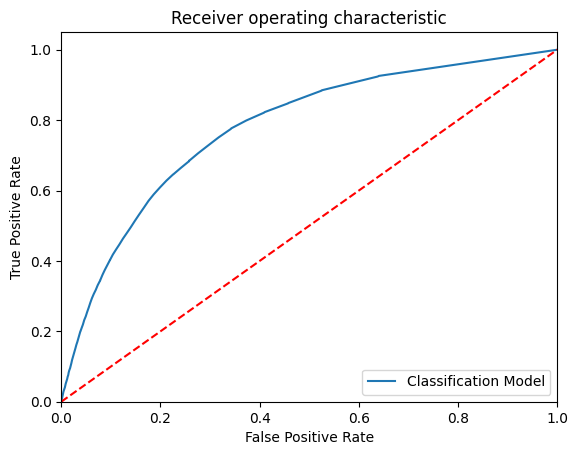

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1221  6912]
 [ 2993 79390]]
Outcome values : 
 1221 6912 2993 79390
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.15      0.20      8133
           0       0.92      0.96      0.94     82383

    accuracy                           0.89     90516
   macro avg       0.60      0.56      0.57     90516
weighted avg       0.86      0.89      0.87     90516

Accuracy : 89.1 %
Precision : 29.0 %
Recall : 15.0 %
F1 Score : 0.198
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 55.7 %
MCC : 0.154
roc_auc_score: 0.557


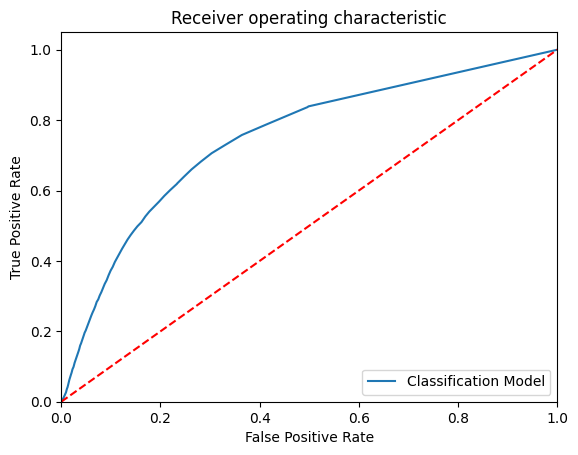

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[  499  7634]
 [  535 81848]]
Outcome values : 
 499 7634 535 81848
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.06      0.11      8133
           0       0.91      0.99      0.95     82383

    accuracy                           0.91     90516
   macro avg       0.70      0.53      0.53     90516
weighted avg       0.88      0.91      0.88     90516

Accuracy : 91.0 %
Precision : 48.3 %
Recall : 6.1 %
F1 Score : 0.109
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 52.8 %
MCC : 0.148
roc_auc_score: 0.527


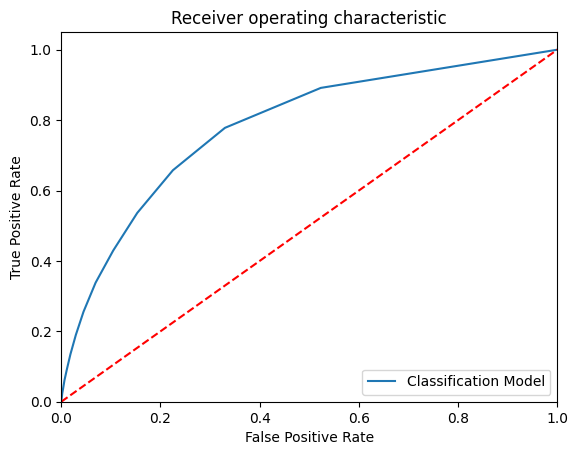

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 3582  4551]
 [ 9862 72521]]
Outcome values : 
 3582 4551 9862 72521
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.44      0.33      8133
           0       0.94      0.88      0.91     82383

    accuracy                           0.84     90516
   macro avg       0.60      0.66      0.62     90516
weighted avg       0.88      0.84      0.86     90516

Accuracy : 84.1 %
Precision : 26.6 %
Recall : 44.0 %
F1 Score : 0.332
Specificity or True Negative Rate : 88.0 %
Balanced Accuracy : 66.0 %
MCC : 0.258
roc_auc_score: 0.66


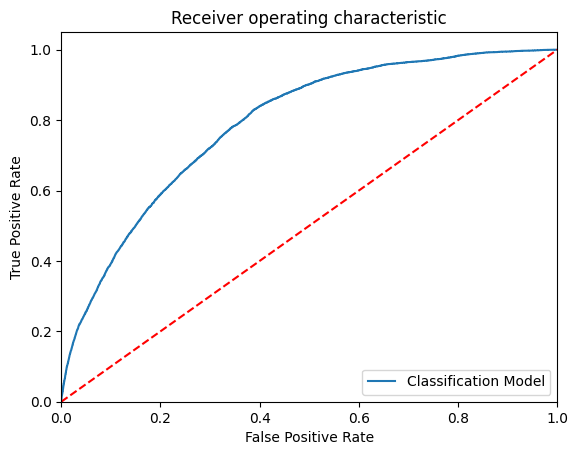

-----------------------------------------------------------------------------------------------------


In [37]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelGNB = GaussianNB(priors=None, var_smoothing=1e-09)
#ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,ModelGNB]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


# Training SVM Seperately

Model Name:  SVM - Linear
Confusion matrix : 
 [[    0  8133]
 [    0 82383]]
Outcome values : 
 0 8133 0 82383
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      8133
           0       0.91      1.00      0.95     82383

    accuracy                           0.91     90516
   macro avg       0.46      0.50      0.48     90516
weighted avg       0.83      0.91      0.87     90516

Accuracy : 91.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


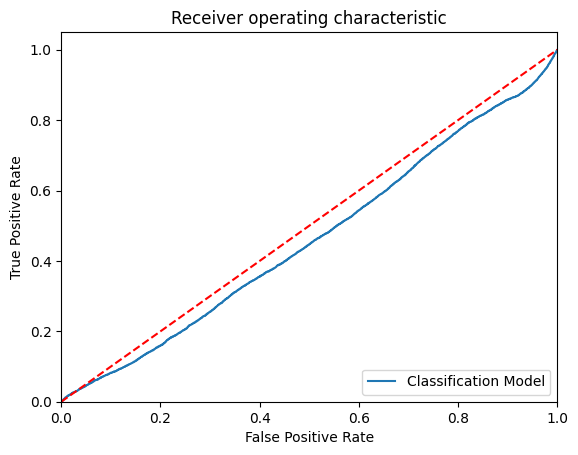

-----------------------------------------------------------------------------------------------------


In [38]:
# Training the SVM algorithm
x_train_reduced = x_train.sample(10000)
y_train_reduced = y_train.sample(10000)
from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model

ModelSVM1.fit(x_train_reduced, y_train_reduced)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [39]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),677,7456,655,81728,0.910,0.508,0.083,0.143,0.992,0.179,0.537645,0.538
1,DecisionTreeClassifier(),2004,6129,6992,75391,0.855,0.223,0.246,0.234,0.915,0.154,0.580766,0.580
2,"(DecisionTreeClassifier(max_features='sqrt', r...",961,7172,1786,80597,0.901,0.350,0.118,0.177,0.978,0.161,0.548241,0.548
3,"(ExtraTreeClassifier(random_state=181732101), ...",1221,6912,2993,79390,0.891,0.290,0.150,0.198,0.964,0.154,0.556899,0.557
4,KNeighborsClassifier(n_neighbors=20),499,7634,535,81848,0.910,0.483,0.061,0.109,0.994,0.148,0.527430,0.528
5,GaussianNB(),3582,4551,9862,72521,0.841,0.266,0.440,0.332,0.880,0.258,0.660359,0.660
6,SVM - Linear,0,8133,0,82383,0.910,NaN,0.000,0.000,1.000,NaN,0.500000,0.500


# KNN Gives the best accuracy

In [40]:
#predict the values of KNN algorithm
y_predF=ModelKNN.predict(x_test)

In [41]:
#create new dataframe with actual vs predicted values
Results=pd.DataFrame({'HeartDisease_A':y_test,'HeartDisease_P_F':y_predF})
#merge the two dataframes on index of both data frames
ResultsFinal = data_bk.merge(Results,left_index=True,right_index=True)

In [42]:
#Displaying the 10 rows
ResultsFinal.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_A,HeartDisease_P_F
115916,No,31.28,No,No,No,12.0,12.0,Yes,Female,55-59,Other,No,Yes,Good,7.0,No,No,No,0,0
82538,No,21.61,No,No,No,0.0,0.0,No,Female,30-34,Asian,No,Yes,Excellent,7.0,No,No,No,0,0
85830,No,23.11,No,No,No,0.0,0.0,No,Male,55-59,White,No,No,Very good,5.0,No,No,No,0,0
39436,No,30.13,Yes,No,No,0.0,0.0,No,Male,75-79,White,"No, borderline diabetes",No,Very good,8.0,No,No,Yes,0,0
93154,No,28.25,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,No,Very good,8.0,No,No,No,0,0
145377,No,20.34,No,No,No,0.0,15.0,No,Female,18-24,White,No,Yes,Very good,7.0,No,No,No,0,0
271566,No,31.62,No,No,No,0.0,5.0,No,Female,18-24,White,No,Yes,Very good,7.0,No,No,No,0,0
93795,No,28.50,Yes,No,No,0.0,5.0,No,Female,40-44,White,No,Yes,Very good,7.0,No,No,No,0,0
270551,Yes,30.13,No,No,No,7.0,0.0,Yes,Male,75-79,White,Yes,No,Fair,8.0,No,No,No,0,0
294091,No,31.64,No,No,Yes,7.0,0.0,No,Female,60-64,White,No,Yes,Good,8.0,Yes,No,No,0,0


In [43]:
ResultsFinal['HeartDisease_P_F'].value_counts()

0    89482
1     1034
Name: HeartDisease_P_F, dtype: int64